In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## Feature Engineering

In [6]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [7]:
df['Ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: Ram, Length: 1303, dtype: object

In [8]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [9]:
df['Gpu']

0       Intel Iris Plus Graphics 640
1             Intel HD Graphics 6000
2              Intel HD Graphics 620
3                 AMD Radeon Pro 455
4       Intel Iris Plus Graphics 650
                    ...             
1298           Intel HD Graphics 520
1299           Intel HD Graphics 520
1300               Intel HD Graphics
1301              AMD Radeon R5 M330
1302               Intel HD Graphics
Name: Gpu, Length: 1303, dtype: object

In [10]:
df['Gpu'] = df['Gpu'].apply(lambda x : x.split()[0])

In [11]:
df['Cpu'] = df['Cpu'].apply(lambda x : x.split()[0])

## Memory numeric digits

In [12]:
 df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
64GB Flash Storage +  1TB HDD      1
5

In [13]:
df = df[df['Memory'].map(df['Memory'].value_counts())>=23]

In [14]:
df['Memory'] = df['Memory'].apply(lambda x : x.split('TB')[0])

In [15]:
df['Memory'] = df['Memory'].apply(lambda x : (x*1000) if x == 1 else x)

In [16]:
df['Memory']

0       128GB SSD
2       256GB SSD
3       512GB SSD
4       256GB SSD
5       500GB HDD
          ...    
1297    500GB HDD
1298    128GB SSD
1299    512GB SSD
1301            1
1302    500GB HDD
Name: Memory, Length: 1166, dtype: object

In [17]:
df['Memory'] = df['Memory'].apply(lambda x : x.split('GB')[0])

In [18]:
df['Memory'].value_counts()

256    485
1      223
128    170
500    132
512    118
32      38
Name: Memory, dtype: int64

## Company

In [19]:
df['Company'].value_counts()

Dell         269
Lenovo       257
HP           256
Asus         142
Acer          97
Toshiba       48
MSI           46
Apple         11
Samsung        8
Microsoft      6
Razer          5
Vero           4
Xiaomi         4
LG             3
Fujitsu        3
Google         3
Huawei         2
Mediacom       2
Name: Company, dtype: int64

In [20]:
df['Gpu'].value_counts()

Intel     650
Nvidia    359
AMD       156
ARM         1
Name: Gpu, dtype: int64

In [21]:
df['TypeName'].value_counts()

Notebook              664
Ultrabook             176
Gaming                176
2 in 1 Convertible    106
Workstation            26
Netbook                18
Name: TypeName, dtype: int64

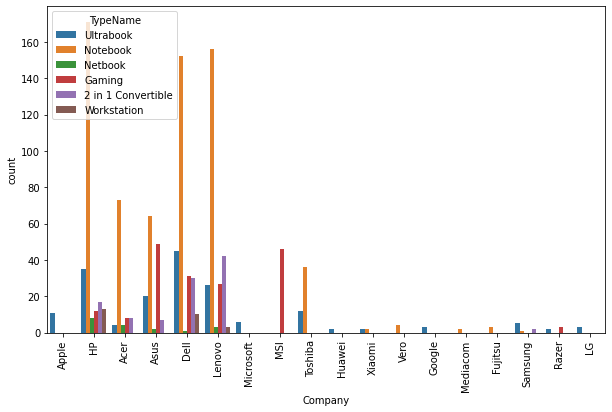

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Company'],hue = df['TypeName'])
plt.xticks(rotation = 'vertical')
plt.show()
plt.tight_layout()

In [23]:
df = df[df['Gpu'] != 'ARM']

In [24]:
df['TypeName'].value_counts()

Notebook              664
Ultrabook             176
Gaming                176
2 in 1 Convertible    105
Workstation            26
Netbook                18
Name: TypeName, dtype: int64

In [25]:
df.OpSys.value_counts()

Windows 10      972
No OS            62
Linux            61
Windows 7        41
Chrome OS        12
macOS            11
Windows 10 S      6
Name: OpSys, dtype: int64

In [4]:
screen_res = df.ScreenResolution.str.split(' ')
pixels = screen_res.map(lambda x :x[-1])

In [5]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [14]:
pixels.nunique


<bound method IndexOpsMixin.nunique of 0       [2560, 1600]
1        [1440, 900]
2       [1920, 1080]
3       [2880, 1800]
4       [2560, 1600]
            ...     
1298    [1920, 1080]
1299    [3200, 1800]
1300     [1366, 768]
1301     [1366, 768]
1302     [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object>

In [6]:
pixels = pixels.str.split('x')
df['screen_width']  = pixels.map(lambda x : x[0])
df['screen_height']  = pixels.map(lambda x : x[1])


In [28]:
df['Weight'] = df['Weight'].str.split('kg')

In [29]:
df['Weight'] = df['Weight'].map(lambda x : x[0])

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_width,screen_height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,8,128,Intel,macOS,1.37,71378.6832,2560,1600
2,HP,Notebook,15.6,Full HD 1920x1080,Intel,8,256,Intel,No OS,1.86,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,16,512,AMD,macOS,1.83,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,8,256,Intel,macOS,1.37,96095.8080,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD,4,500,AMD,Windows 10,2.1,21312.0000,1366,768


In [31]:
df = df[df['OpSys'].map(df['OpSys'].value_counts())>=45]

In [32]:
df.OpSys.value_counts()

Windows 10    972
No OS          62
Linux          61
Name: OpSys, dtype: int64

In [33]:
df = df[df['Company'].map(df['Company'].value_counts())>25]

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_width,screen_height
2,HP,Notebook,15.6,Full HD 1920x1080,Intel,8,256,Intel,No OS,1.86,30636.000,1920,1080
5,Acer,Notebook,15.6,1366x768,AMD,4,500,AMD,Windows 10,2.1,21312.000,1366,768
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel,16,512,Nvidia,Windows 10,1.3,79653.600,1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,8,256,Intel,Windows 10,1.6,41025.600,1920,1080
10,HP,Notebook,15.6,1366x768,Intel,4,500,Intel,No OS,1.86,20986.992,1366,768


In [35]:
df.drop(columns=['ScreenResolution'],inplace= True)

In [36]:
df.reset_index(inplace= True)

In [37]:
# df = pd.get_dummies(data = df,columns=['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys'], drop_first= True )

In [38]:
df.head()

,index,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_width,screen_height
0,2,HP,Notebook,15.6,Intel,8,256,Intel,No OS,1.86,30636.000,1920,1080
1,5,Acer,Notebook,15.6,AMD,4,500,AMD,Windows 10,2.1,21312.000,1366,768
2,8,Asus,Ultrabook,14.0,Intel,16,512,Nvidia,Windows 10,1.3,79653.600,1920,1080
3,9,Acer,Ultrabook,14.0,Intel,8,256,Intel,Windows 10,1.6,41025.600,1920,1080
4,10,HP,Notebook,15.6,Intel,4,500,Intel,No OS,1.86,20986.992,1366,768


In [39]:
df.drop('index',axis = 1, inplace= True)

In [40]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_width,screen_height
0,HP,Notebook,15.6,Intel,8,256,Intel,No OS,1.86,30636.000,1920,1080
1,Acer,Notebook,15.6,AMD,4,500,AMD,Windows 10,2.1,21312.000,1366,768
2,Asus,Ultrabook,14.0,Intel,16,512,Nvidia,Windows 10,1.3,79653.600,1920,1080
3,Acer,Ultrabook,14.0,Intel,8,256,Intel,Windows 10,1.6,41025.600,1920,1080
4,HP,Notebook,15.6,Intel,4,500,Intel,No OS,1.86,20986.992,1366,768


In [41]:
df['screen_height'] = df['screen_height'].astype('int64')
df['screen_width'] = df['screen_width'].astype('int64')
df['Ram'] = df['Ram'].astype('int64')
df['Weight'] = df['Weight'].astype('float')
df['Memory'] = df['Memory'].astype('int64')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1065 non-null   object 
 1   TypeName       1065 non-null   object 
 2   Inches         1065 non-null   float64
 3   Cpu            1065 non-null   object 
 4   Ram            1065 non-null   int64  
 5   Memory         1065 non-null   int64  
 6   Gpu            1065 non-null   object 
 7   OpSys          1065 non-null   object 
 8   Weight         1065 non-null   float64
 9   Price          1065 non-null   float64
 10  screen_width   1065 non-null   int64  
 11  screen_height  1065 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 100.0+ KB


## Splitting the Data

In [43]:
X = df.drop('Price', axis = 1)
# y = df['Price']
y = np.log(df['Price'])

## Importing Sklearn Packages

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=47)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [47]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_width,screen_height
0,HP,Notebook,15.6,Intel,8,256,Intel,No OS,1.86,30636.000,1920,1080
1,Acer,Notebook,15.6,AMD,4,500,AMD,Windows 10,2.10,21312.000,1366,768
2,Asus,Ultrabook,14.0,Intel,16,512,Nvidia,Windows 10,1.30,79653.600,1920,1080
3,Acer,Ultrabook,14.0,Intel,8,256,Intel,Windows 10,1.60,41025.600,1920,1080
4,HP,Notebook,15.6,Intel,4,500,Intel,No OS,1.86,20986.992,1366,768


## Linear Regression

In [82]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop = 'first'),
                                        [0,1,3,6,7])],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))

R2 score:  0.7425374225785375
Mean Absolute Error:  0.23506171321082983


## Random Forest Regressor

## Using GridSearch CV

In [49]:
# n_estimators = [20,60,100,120]
# max_samples = [0.5,0.75,1]
# max_features = [0.5,0.75,1]
# max_depth = [2,8,None]

# param_grid = {'n_estimators': n_estimators,
#                               'max_samples' : max_samples,
#                               'max_features' : max_features,
#                               'max_depth' : max_depth }
param_grid = {
    'step2__n_estimators': [100, 200, 300],  # number of trees
    'step2__random_state': [None, 1, 42],  # random seed for reproducibility
    'step2__max_samples': [0.25, 0.5, 0.75],  # fraction of samples to be used for each tree
    'step2__max_features': [0.5, 0.75, 1.0],  # maximum number of features to consider for each split
    'step2__max_depth': [None, 5, 10],  # maximum depth of the tree
}

In [95]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop = 'first'),
                                        [0,1,3,6,7])],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                               random_state = 1,
                              max_samples = 0.5,
                              max_features = 0.75,
                              max_depth = None)

                              

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

rfr_pred = pipe.predict(X_test)

print('R2 score: ', r2_score(y_test,rfr_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,rfr_pred))

R2 score:  0.8895544919157992
Mean Absolute Error:  0.15049873178528217


* This result (of Random Forest) is without any params
R2 score:  0.8727094641243716
Mean Absolute Error:  0.16677309699345017

In [51]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(pipe, param_grid,cv = 5,verbose=2,n_jobs=-1)

In [52]:
step2.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [53]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 6, 7])])),
                ('step2',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5))])

In [54]:
# grid_cv.fit(X_train,y_train)

In [55]:
# best_params = grid_cv.best_params_
# best_score = grid_cv.best_score_

# # Use the best model for prediction
# best_model = grid_cv.best_estimator_
# rfr_pred = best_model.predict(X_test)

# # Print the evaluation metrics
# print('R2 score:', r2_score(y_test, rfr_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, rfr_pred))
# print(best_params)
# print(best_score)

# R2 score: 0.8758692885641938
# Mean Absolute Error: 0.16740943099800987
# {'step2__max_depth': None,
# 'step2__max_features': 0.5,
#     'step2__max_samples': 0.75,
#         'step2__n_estimators': 100,
#             'step2__random_state': 1}
# 0.837040254217583

## Ada Boost

In [56]:
# step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),
#                                         [0,1,3,6,7])],remainder='passthrough')

# step2 = AdaBoostRegressor(n_estimators=15, learning_rate = 1.0)
                              


# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# ada_pred = pipe.predict(X_test)

# print('R2 score: ', r2_score(y_test,ada_pred))
# print('Mean Absolute Error: ', mean_absolute_error(y_test,ada_pred))


In [98]:
# import pickle

# pickle.dump(df,open('df.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))
from joblib import dump, load

dump(pipe,'pipe.pkl')


In [58]:
# new_df = pd.get_dummies(data = df,columns=['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', ],drop_first= True)

In [59]:
# new_df.head()

In [60]:
# X_new = new_df.drop('Price',axis = 1)
# y_new =np.log(new_df['Price']) 

In [61]:
# new_rfr = RandomForestRegressor(max_depth= None,max_features= 0.5,max_samples= 0.75,n_estimators= 100,random_state= 1)

In [62]:
# scores = []

# for i in range(100):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=i)
#     new_rfr.fit(X_train,y_train)
#     new_rfr_pred = new_rfr.predict(X_test)
#     score = r2_score(y_test, new_rfr_pred)
#     scores.append(score)

In [63]:
# np.argmax(scores)

In [64]:
# X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.15, random_state=21)
# new_rfr.fit(X_new_train,y_new_train)
# new_rfr_pred = new_rfr.predict(X_new_test)
# score = r2_score(y_new_test, new_rfr_pred)
# print(score)

In [65]:
# mean_absolute_error(y_new_test,new_rfr_pred)

In [113]:
X_test.iloc[100]

Company                Acer
TypeName           Notebook
Inches                 15.6
Cpu                     AMD
Ram                       4
Memory                  500
Gpu                     AMD
OpSys            Windows 10
Weight                  2.4
screen_width           1366
screen_height           768
Name: 896, dtype: object

In [114]:
np.exp(y_test.iloc[100])

20619.360000000004

In [67]:
# pickle.dump(pipe,open('pipe.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))

In [68]:
# A = pipe.predict(X_test)[:10]

In [69]:
# B = y_test[:10]

In [70]:
# print(np.exp(A))


In [71]:
# print(np.exp(B))

In [72]:
# A_new = new_rfr.predict(X_new_test)[:10]

In [73]:
# B_new = y_new_test[:10]

In [74]:
# print(np.exp(A_new))

In [75]:
# print(np.exp(B_new))